In [1]:
### Increase Width ###
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
## ###############################################################
## MODULES
## ###############################################################
import os
import sys
import numpy as np
import cmasher as cmr # https://cmasher.readthedocs.io/user/introduction.html#colormap-overview
import matplotlib as mpl

from os import path
from matplotlib.collections import LineCollection

sys.path.append("/Users/dukekriel/Documents/Studies/TurbulentDynamo/codes")
## load old user defined modules
from the_matplotlib_styler import *
from the_useful_library import *
from the_loading_library import *
from the_fitting_library import *
from the_plotting_library import *

In [3]:
filepath_data_base = "/Users/dukekriel/Documents/Studies/TurbulentDynamo/data/sub_sonic"
filepath_plot = "/Users/dukekriel/Documents/Studies/TurbulentDynamo/figures/sub_sonic"

In [4]:
class fitData():
    def __init__(
            self
        ):
        self.suite_group_sim = []
        self.label_group_sim = []
        self.Re_group_sim = []
        self.Rm_group_sim = []
        self.Pm_group_sim = []
        self.list_vel_params_group_sim = []
        self.list_mag_params_group_sim = []
        self.list_vel_params_std_group_sim = []
        self.list_mag_params_std_group_sim = []
        self.list_k_nu_conv_group_sim  = []
        self.list_k_eta_conv_group_sim = []
        self.list_k_max_conv_group_sim = []
        self.list_vel_t_group_sim = []
        self.list_mag_t_group_sim = []
        self.list_vel_fit_range_group_sim = []
        self.list_mag_fit_range_group_sim = []
        self.list_k_nu_t_group_sim  = []
        self.list_k_eta_t_group_sim = []
        self.list_k_max_t_group_sim = []
    def appendData(
            self,
            suite, label,
            Re, Rm, Pm,
            list_vel_params_t,
            list_mag_params_t,
            list_vel_params_std_t,
            list_mag_params_std_t,
            list_k_nu_conv,
            list_k_eta_conv,
            list_k_max_conv,
            list_vel_t,
            list_mag_t,
            list_vel_fit_range,
            list_mag_fit_range,
            list_k_nu_t,
            list_k_eta_t,
            list_k_max_t
        ):
        ## simulation information
        self.suite_group_sim.append(suite)
        self.label_group_sim.append(label)
        self.Re_group_sim.append(Re)
        self.Rm_group_sim.append(Rm)
        self.Pm_group_sim.append(Pm)
        ## fitted parameters
        self.list_vel_params_group_sim.append(list_vel_params_t)
        self.list_mag_params_group_sim.append(list_mag_params_t)
        self.list_vel_params_std_group_sim.append(list_vel_params_std_t)
        self.list_mag_params_std_group_sim.append(list_mag_params_std_t)
        ## converged scales
        self.list_k_nu_conv_group_sim.append(list_k_nu_conv)
        self.list_k_eta_conv_group_sim.append(list_k_eta_conv)
        self.list_k_max_conv_group_sim.append(list_k_max_conv)
        ## time evolving scales
        self.list_vel_t_group_sim.append(list_vel_t)
        self.list_mag_t_group_sim.append(list_mag_t)
        self.list_vel_fit_range_group_sim.append(list_vel_fit_range)
        self.list_mag_fit_range_group_sim.append(list_mag_fit_range)
        self.list_k_nu_t_group_sim.append(list_k_nu_t)
        self.list_k_eta_t_group_sim.append(list_k_eta_t)
        self.list_k_max_t_group_sim.append(list_k_max_t)

In [5]:
## initialise plotting lists
fit_data_full  = fitData()
fit_data_mixed = fitData()

for suite_folder in [ "Re10", "Re500", "Rm3000", "keta" ]:
    for sim_folder in [ "Pm1", "Pm2", "Pm4", "Pm5", "Pm10", "Pm25", "Pm50", "Pm125", "Pm250" ]:
        ## create filepath to data
        filepath_data = createFilepath([
            filepath_data_base,
            suite_folder,
            "288",
            sim_folder
        ])
        ## check that the simulation data exists
        if not path.exists(filepath_data):
            continue
        ## load data from fitting full model
        scales_obj_full = loadPickleObject(
            createFilepath([
                filepath_data_base,
                suite_folder
            ]),
            sim_folder + "_scale_converge_obj_full.pkl",
            bool_hide_updates = True
        )
        spectra_obj_full = loadPickleObject(
            createFilepath([
                filepath_data_base,
                suite_folder,
                "288",
                sim_folder
            ]),
            "spectra_obj_full.pkl",
            bool_hide_updates = True
        )
        fit_data_full.appendData(
            suite = suite_folder,
            label = sim_folder,
            Re = spectra_obj_full.Re,
            Rm = spectra_obj_full.Rm,
            Pm = spectra_obj_full.Pm,
            list_vel_params_t = spectra_obj_full.vel_list_fit_params_group_t,
            list_mag_params_t = spectra_obj_full.mag_list_fit_params_group_t,
            list_vel_params_std_t = spectra_obj_full.vel_list_fit_std_group_t,
            list_mag_params_std_t = spectra_obj_full.mag_list_fit_std_group_t,
            list_k_nu_conv  = scales_obj_full.list_k_nu_converged,
            list_k_eta_conv = scales_obj_full.list_k_eta_converged,
            list_k_max_conv = scales_obj_full.list_k_max_converged,
            list_vel_t = spectra_obj_full.vel_sim_times,
            list_mag_t = spectra_obj_full.mag_sim_times,
            list_vel_fit_range = [
                spectra_obj_full.vel_fit_start_t,
                spectra_obj_full.vel_fit_end_t
            ],
            list_mag_fit_range = [
                spectra_obj_full.mag_fit_start_t,
                spectra_obj_full.mag_fit_end_t
            ],
            list_k_nu_t  = spectra_obj_full.k_nu_group_t,
            list_k_eta_t = spectra_obj_full.k_eta_group_t,
            list_k_max_t = spectra_obj_full.k_max_group_t
        )
        ## load data from fitting mixed model
        scales_obj_mixed = loadPickleObject(
            createFilepath([
                filepath_data_base,
                suite_folder
            ]),
            sim_folder + "_scale_converge_obj_mixed.pkl",
            bool_hide_updates = True
        )
        spectra_obj_mixed = loadPickleObject(
            createFilepath([
                filepath_data_base,
                suite_folder,
                "288",
                sim_folder
            ]),
            "spectra_obj_mixed.pkl",
            bool_hide_updates = True
        )
        fit_data_mixed.appendData(
            suite = suite_folder,
            label = sim_folder,
            Re = spectra_obj_mixed.Re,
            Rm = spectra_obj_mixed.Rm,
            Pm = spectra_obj_mixed.Pm,
            list_vel_params_t = spectra_obj_mixed.vel_list_fit_params_group_t,
            list_mag_params_t = spectra_obj_mixed.mag_list_fit_params_group_t,
            list_vel_params_std_t = spectra_obj_mixed.vel_list_fit_std_group_t,
            list_mag_params_std_t = spectra_obj_mixed.mag_list_fit_std_group_t,
            list_k_nu_conv  = scales_obj_mixed.list_k_nu_converged,
            list_k_eta_conv = scales_obj_mixed.list_k_eta_converged,
            list_k_max_conv = scales_obj_mixed.list_k_max_converged,
            list_vel_t = spectra_obj_mixed.vel_sim_times,
            list_mag_t = spectra_obj_mixed.mag_sim_times,
            list_vel_fit_range = [
                spectra_obj_mixed.vel_fit_start_t,
                spectra_obj_mixed.vel_fit_end_t
            ],
            list_mag_fit_range = [
                spectra_obj_mixed.mag_fit_start_t,
                spectra_obj_mixed.mag_fit_end_t
            ],
            list_k_nu_t  = spectra_obj_mixed.k_nu_group_t,
            list_k_eta_t = spectra_obj_mixed.k_eta_group_t,
            list_k_max_t = spectra_obj_mixed.k_max_group_t
        )
        ## check analysis setups
        print(suite_folder, sim_folder)
#         ## full model
#         print(
#             spectra_obj_full.bool_vel_fixed_model,
#             spectra_obj_full.bool_mag_fixed_model
#         )
#         ## mixed model
#         print(
#             spectra_obj_mixed.bool_vel_fixed_model,
#             spectra_obj_mixed.bool_mag_fixed_model
#         )

Re10 Pm25
Re10 Pm50
Re10 Pm125
Re10 Pm250
Re500 Pm1
Re500 Pm2
Re500 Pm4
Rm3000 Pm1
Rm3000 Pm2
Rm3000 Pm5
Rm3000 Pm10
Rm3000 Pm25
Rm3000 Pm50
Rm3000 Pm125
Rm3000 Pm250
keta Pm25
keta Pm50
keta Pm125
keta Pm250


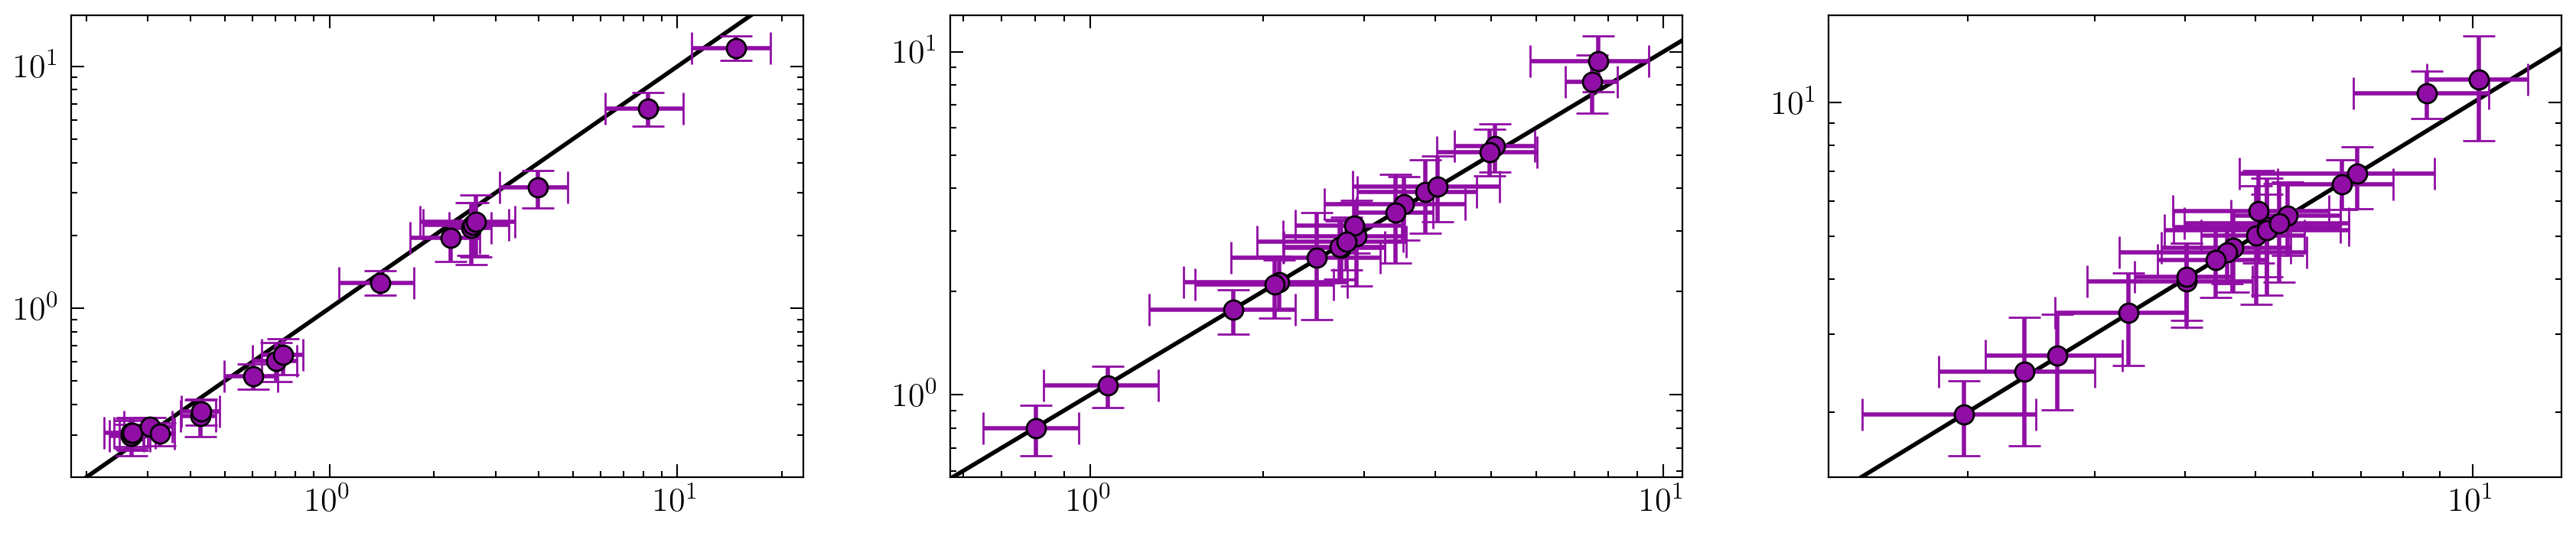

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(7*3, 4))
for sim_index in range(len(fit_data_mixed.Re_group_sim)):
    plotErrorBar(
        axs[0],
        data_x = fit_data_mixed.list_k_nu_conv_group_sim[sim_index],
        data_y = fit_data_full.list_k_nu_conv_group_sim[sim_index],
        marker = "o",
        ms = 9
    )
    plotErrorBar(
        axs[1],
        data_x = fit_data_mixed.list_k_eta_conv_group_sim[sim_index],
        data_y = fit_data_full.list_k_eta_conv_group_sim[sim_index],
        marker = "o",
        ms = 9
    )
    plotErrorBar(
        axs[2],
        data_x = fit_data_mixed.list_k_max_conv_group_sim[sim_index],
        data_y = fit_data_full.list_k_max_conv_group_sim[sim_index],
        marker = "o",
        ms = 9
    )
plot_domain = np.logspace(-2, 3, 100)
axs[0].add_collection(
    LineCollection(
        [ np.column_stack(( plot_domain, plot_domain )) ],
        linestyle="-", lw=2, color="black", zorder=7
    ),
    autolim = False # ignore these  points when setting the axis limits
)
axs[1].add_collection(
    LineCollection(
        [ np.column_stack(( plot_domain, plot_domain )) ],
        linestyle="-", lw=2, color="black", zorder=7
    ),
    autolim = False # ignore these  points when setting the axis limits
)
axs[2].add_collection(
    LineCollection(
        [ np.column_stack(( plot_domain, plot_domain )) ],
        linestyle="-", lw=2, color="black", zorder=7
    ),
    autolim = False # ignore these  points when setting the axis limits
)
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[2].set_xscale("log")
axs[2].set_yscale("log")
plt.show()

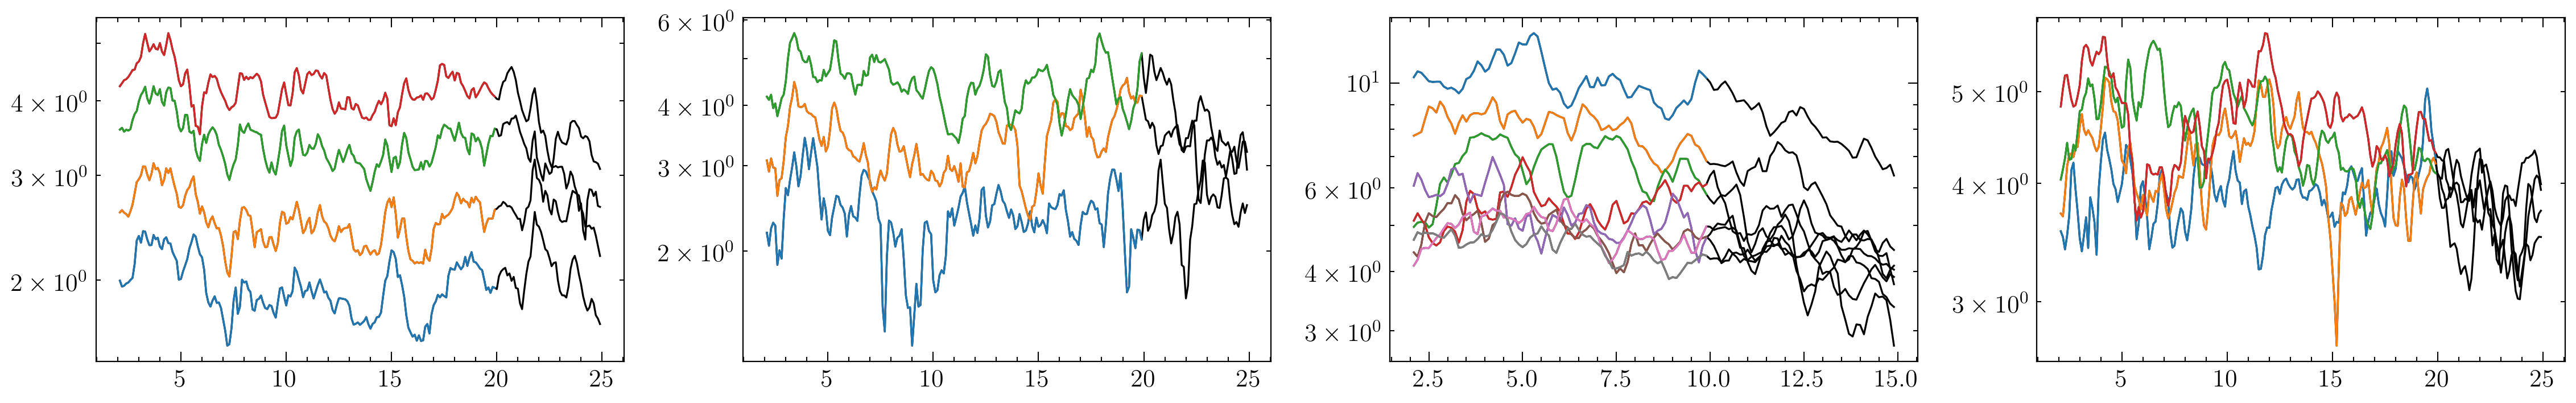

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(7*4, 4))
fig.subplots_adjust(wspace=0.225)

ax_index_dic = {
    "Re10":0,
    "Re500":1,
    "Rm3000":2,
    "keta":3
}

ax_plot_range_dic = {
    0:25,
    1:25,
    2:15,
    3:25
}

for sim_index in range(len(fit_data_mixed.Re_group_sim)):
    ## get index of axis
    ax_index = ax_index_dic[fit_data_mixed.suite_group_sim[sim_index]]
    ## plot full dataset
    axs[ax_index].plot(
        fit_data_mixed.list_mag_t_group_sim[sim_index][
            0 : getIndexClosestValue(
                fit_data_mixed.list_mag_t_group_sim[sim_index],
                ax_plot_range_dic[ax_index]
            )
        ],
        fit_data_mixed.list_k_max_t_group_sim[sim_index][
            0 : getIndexClosestValue(
                fit_data_mixed.list_mag_t_group_sim[sim_index],
                ax_plot_range_dic[ax_index]
            )
        ],
        ls     = "-",
        color  = "k",
        zorder = 3
    )
    ## get fitting range
    mag_index_start = getIndexClosestValue(
        fit_data_mixed.list_mag_t_group_sim[sim_index],
        fit_data_mixed.list_mag_fit_range_group_sim[sim_index][0]
    )
    mag_index_end = getIndexClosestValue(
        fit_data_mixed.list_mag_t_group_sim[sim_index],
        fit_data_mixed.list_mag_fit_range_group_sim[sim_index][1]
    )
    ## plot data in fitting range
    axs[ax_index].plot(
        fit_data_mixed.list_mag_t_group_sim[sim_index][
            mag_index_start : mag_index_end
        ],
        fit_data_mixed.list_k_max_t_group_sim[sim_index][
            mag_index_start : mag_index_end
        ],
        ls = "-",
        zorder = 5
    )
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
axs[3].set_yscale("log")
plt.show()

In [8]:
for sim_index in range(len(fit_data_mixed.Re_group_sim)):
    ## get indices bounding fit range
    vel_index_start = getIndexClosestValue(
        fit_data_mixed.list_vel_t_group_sim[sim_index],
        fit_data_mixed.list_vel_fit_range_group_sim[sim_index][0]
    )
    vel_index_end = getIndexClosestValue(
        fit_data_mixed.list_vel_t_group_sim[sim_index],
        fit_data_mixed.list_vel_fit_range_group_sim[sim_index][1]
    )
    mag_index_start = getIndexClosestValue(
        fit_data_mixed.list_mag_t_group_sim[sim_index],
        fit_data_mixed.list_mag_fit_range_group_sim[sim_index][0]
    )
    mag_index_end = getIndexClosestValue(
        fit_data_mixed.list_mag_t_group_sim[sim_index],
        fit_data_mixed.list_mag_fit_range_group_sim[sim_index][1]
    )
    ## get alpha parameter data
    list_alpha_vel = [
        list_params[1]
        for list_params in fit_data_full.list_vel_params_group_sim[sim_index]
    ][vel_index_start : vel_index_end]
    list_alpha_mag = [
        list_params[1]
        for list_params in fit_data_full.list_mag_params_group_sim[sim_index]
    ][mag_index_start : mag_index_end]
    ## get alpha parameter uncertainties
    list_alpha_vel_std = [
        75 * list_params_std[1] if list_params_std[1] < 0.01
        else 50 * list_params_std[1] if list_params_std[1] < 0.1
        else list_params_std[1]
        for list_params_std in fit_data_full.list_vel_params_std_group_sim[sim_index]
    ][vel_index_start : vel_index_end]
    list_alpha_mag_std = [
        50 * list_params_std[1] if list_params_std[1] < 0.01
        else 10 * list_params_std[1] if (list_params_std[1] < 0.1) and (fit_data_mixed.Re_group_sim[sim_index] > 100)
        else 7.5 * list_params_std[1] if (list_params_std[1] < 0.1) and (fit_data_mixed.Re_group_sim[sim_index] < 100)
        else list_params_std[1]
        for list_params_std in fit_data_full.list_mag_params_std_group_sim[sim_index]
    ][mag_index_start : mag_index_end]
    ## calculate lists
    list_vel_alpha_lower = [
        vel_alpha - vel_alpha_std
        for vel_alpha, vel_alpha_std in zip(
            list_alpha_vel,
            list_alpha_vel_std
        )
    ]
    list_vel_alpha_upper = [
        vel_alpha + vel_alpha_std
        for vel_alpha, vel_alpha_std in zip(
            list_alpha_vel,
            list_alpha_vel_std
        )
    ]
    list_mag_alpha_lower = [
        mag_alpha - mag_alpha_std
        for mag_alpha, mag_alpha_std in zip(
            list_alpha_mag,
            list_alpha_mag_std
        )
    ]
    list_mag_alpha_upper = [
        mag_alpha + mag_alpha_std
        for mag_alpha, mag_alpha_std in zip(
            list_alpha_mag,
            list_alpha_mag_std
        )
    ]

#     print(
#         fit_data_full.suite_group_sim[sim_index],
#         fit_data_full.label_group_sim[sim_index]
#     )
    
    vel_alpha_mean = np.min([np.mean(list_alpha_vel), -1])
    str_vel_val = "{:.0f}".format(vel_alpha_mean)
    str_vel_std_lower = "{:.0f}".format(vel_alpha_mean - np.mean(list_vel_alpha_lower))
    str_vel_std_upper = "+{:.0f}".format(np.mean(list_vel_alpha_upper) - vel_alpha_mean)
    
    mag_alpha_mean = np.mean(list_alpha_mag)
    str_mag_val = "{:.1f}".format(mag_alpha_mean)
    str_mag_std_lower = "{:.1f}".format(mag_alpha_mean - np.mean(list_mag_alpha_lower))
    str_mag_std_upper = "+{:.1f}".format(np.mean(list_mag_alpha_upper) - mag_alpha_mean)

    print("& ${}_{{-{}}}^{{{}}}$ & ${}_{{-{}}}^{{{}}}$".format(
        str_vel_val,
        str_vel_std_lower,
        str_vel_std_upper,
        str_mag_val,
        str_mag_std_lower,
        str_mag_std_upper
    ))

& $-3_{-2}^{+2}$ & $3.0_{-0.2}^{+0.2}$
& $-3_{-2}^{+2}$ & $2.9_{-0.3}^{+0.3}$
& $-3_{-2}^{+2}$ & $2.8_{-0.4}^{+0.4}$
& $-3_{-2}^{+2}$ & $2.7_{-0.4}^{+0.4}$
& $-1_{-2}^{+3}$ & $1.6_{-0.4}^{+0.4}$
& $-1_{-2}^{+3}$ & $1.7_{-0.4}^{+0.4}$
& $-1_{-3}^{+3}$ & $1.7_{-0.3}^{+0.3}$
& $-1_{-1}^{+1}$ & $1.9_{-0.2}^{+0.2}$
& $-1_{-1}^{+1}$ & $1.7_{-0.2}^{+0.2}$
& $-1_{-2}^{+3}$ & $1.8_{-0.3}^{+0.3}$
& $-1_{-2}^{+2}$ & $1.7_{-0.2}^{+0.2}$
& $-2_{-1}^{+1}$ & $1.8_{-0.3}^{+0.3}$
& $-1_{-1}^{+2}$ & $2.1_{-0.2}^{+0.2}$
& $-1_{--0}^{+1}$ & $2.4_{-0.3}^{+0.3}$
& $-2_{-2}^{+2}$ & $2.6_{-0.3}^{+0.3}$
& $-1_{-1}^{+3}$ & $2.1_{-0.3}^{+0.3}$
& $-1_{-0}^{+1}$ & $2.2_{-0.3}^{+0.3}$
& $-1_{--0}^{+1}$ & $2.3_{-0.3}^{+0.3}$
& $-1_{-1}^{+1}$ & $2.5_{-0.3}^{+0.3}$


In [9]:
# num_sims = len(fit_data_mixed.Re_group_sim)
# with open("alpha_kin.txt", "w") as txt_file:
#     for sim_index in range(num_sims):
#         ## get indices bounding fit range
#         index_start = getIndexClosestValue(
#             fit_data_mixed.list_vel_t_group_sim[sim_index],
#             fit_data_mixed.list_vel_fit_range_group_sim[sim_index][0]
#         )
#         index_end = getIndexClosestValue(
#             fit_data_mixed.list_vel_t_group_sim[sim_index],
#             fit_data_mixed.list_vel_fit_range_group_sim[sim_index][1]
#         )
#         ## get alpha parameter data
#         list_alpha = [
#             list_params[1]
#             for list_params in fit_data_full.list_vel_params_group_sim[sim_index]
#         ][index_start : index_end]
#         ## get alpha parameter uncertainties
#         list_alpha_std = [
#             75 * list_params_std[1]
#             if list_params_std[1] < 0.1
#             else list_params_std[1]
#             for list_params_std in fit_data_full.list_vel_params_std_group_sim[sim_index]
#         ][index_start : index_end]
#         ## write to text file
#         txt_file.write((", ".join(str(alpha) for alpha in list_alpha)))
#         txt_file.write("\n")
#         txt_file.write((", ".join(str(alpha_std) for alpha_std in list_alpha_std)))
#         txt_file.write("\n")

num_sims = 19
with open("alpha_kin.txt", "r") as txt_file:
    txt_data = txt_file.readlines()
fig, axs = plt.subplots(num_sims, 2, figsize=(8*2, 5*num_sims))
fig.subplots_adjust(hspace=0.1, wspace=0.25)
bool_left_axis = True
sim_index = 0
for txt_line in txt_data:
    list_vals = [float(i) for i in txt_line.split(", ")]
    ## lable plots
    axs[sim_index, 0].set_xlabel(r"$\alpha_\mathrm{kin}$", fontsize=24)
    axs[sim_index, 1].set_xlabel(r"$\sigma_{\alpha_\mathrm{kin}}$", fontsize=24)
    axs[sim_index, 0].set_ylabel(r"Count", fontsize=24)
    axs[sim_index, 1].set_ylabel(r"Count", fontsize=24)
    ## plot histograms
    if bool_left_axis:
        plotHistogram(
            ax = axs[sim_index, 0],
            vals = list_vals,
            num_bins = 10
        )
        bool_left_axis = False
    else:
        plotHistogram(
            ax = axs[sim_index, 1],
            vals = list_vals,
            num_bins = 10
        )
        bool_left_axis = True
        sim_index += 1
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'alpha_kin.txt'

In [10]:
def funcPlotExponent(
        ## where to save figure
        filepath_plot,
        ## data point colors
        list_colors, list_markers,
        ## simulation parameters
        list_Re, list_Rm, list_Pm,
        ## measured scales
        list_alpha_mag_group, list_alpha_mag_std_group
    ):
    ## #################
    ## INITIALISE FIGURE
    ## ##########
    factor = 1.45
    fig, ax = plt.subplots(figsize=(8/factor, 5/factor))
    ## plot points
    for sim_index in range(len(list_alpha_mag_group)):
        alpha_mean = np.mean(list_alpha_mag_group[sim_index])
        ## calculate lists
        list_alpha_lower = [
            mag_alpha - mag_alpha_std
            for mag_alpha, mag_alpha_std in zip(
                list_alpha_mag_group[sim_index],
                list_alpha_mag_std_group[sim_index]
            )
        ]
        list_alpha_upper = [
            mag_alpha + mag_alpha_std
            for mag_alpha, mag_alpha_std in zip(
                list_alpha_mag_group[sim_index],
                list_alpha_mag_std_group[sim_index]
            )
        ]
        ## print values
        alpha_lower = alpha_mean - np.mean(list_alpha_lower)
        alpha_upper = np.mean(list_alpha_upper) - alpha_mean
        ## plot dependance on exponent on Re
        ax.errorbar(
            list_Re[sim_index],
            alpha_mean,
            yerr = np.vstack([
                alpha_lower,
                alpha_upper,
            ]),
            color  = list_colors[sim_index],
            fmt    = list_markers[sim_index],
            markersize=9, elinewidth=2, linestyle="None", markeredgecolor="black", capsize=7.5, zorder=10
        )
    ## fit to Re > 100 data
    fit_param, fit_cov = curve_fit(
        ListOfModels.constant,
        [
            Re
            for Re in list_Re
            if Re > 100
        ],
        [
            np.median(list_kaz_exp)
            for Re, list_kaz_exp in zip(
                list_Re,
                list_alpha_mag_group
            )
            if Re > 100
        ],
        sigma = [
            np.std(list_kaz_exp)
            for Re, list_kaz_exp in zip(
                list_Re,
                list_alpha_mag_group
            )
            if Re > 100
        ],
        absolute_sigma = True
    )
    fit_mean = fit_param[0]
    fit_std = np.sqrt(np.diag(fit_cov))[0]
    ## add average line
    ax.axhline(y=fit_mean, dashes=(5, 1.5), color="orangered", lw=1.5)
    ## add asymptotic line
    ax.axhline(y=3/2, ls=":", color="black", lw=1.5)
    ## add legend: simulation marker
    addLegend(
        ax  = ax,
        loc  = "upper right",
        bbox = (1.0, 1.0),
        artists = [ "s", "D", "o", "v" ],
        colors  = [ "black" ] * 4,
        legend_labels  = [
            r"Re $= 10$",
            r"Re $\approx 450$",
            r"Rm $\approx 3300$",
            r"$k_{\eta, \mathrm{theory}} \approx 125$"
        ],
        ms = 9,
        tpad = 0.1,
        rspacing = 0.5,
        cspacing = 0.5,
        ncol = 2,
        fontsize = 15,
        labelcolor = "white"
    )
    ax.text(
        0.35, 0.925,
        r"Re $= 10$", color="black",
        va="top", ha="left", transform=ax.transAxes, fontsize=15, zorder=10
    )
    ax.text(
        0.675, 0.925,
        r"Rm $\approx 3300$", color="black",
        va="top", ha="left", transform=ax.transAxes, fontsize=15, zorder=10
    )
    ax.text(
        0.35, 0.81,
        r"Re $\approx 450$", color="black",
        va="top", ha="left", transform=ax.transAxes, fontsize=15, zorder=10
    )
    ax.text(
        0.675, 0.81,
        r"$k_{\eta, \mathrm{theory}} \approx 125$", color="black",
        va="top", ha="left", transform=ax.transAxes, fontsize=15, zorder=10
    )
    ## add Reynolds number legend
    ax.text(
        0.935, 0.675,
        r"Re $< 100$", color="blue",
        va="top", ha="right", transform=ax.transAxes, fontsize=15
    )
    ax.text(
        0.935, 0.565,
        r"Re $> 100$", color="red",
        va="top", ha="right", transform=ax.transAxes, fontsize=15
    )
    ## add legend: lines
    ax.text(
        0.05, 0.2,
        r"$\alpha_{\mathrm{mag}} =$ " + r"${} \pm {}$".format(
            "{:0.1f}".format( fit_mean ),
            "{:0.1f}".format( fit_std )
        ),
        va="bottom", ha="left", transform=ax.transAxes, fontsize=15, color="orangered"
    )
    ax.text(
        0.05, 0.09,
        r"$\alpha_{\mathrm{mag}} = 1.5$",
        va="bottom", ha="left", transform=ax.transAxes, fontsize=15, color="black"
    )
    ## label axis
    ax.set_xlabel(r"Re", fontsize=22)
    ax.set_ylabel(r"$\alpha_{\mathrm{mag}}$", fontsize=22)
    ## adjust axis
    ax.set_xscale("log")
    ## save plot
    fig_name = "fig_exponent_mixed.pdf"
    fig_filepath = createFilepath([filepath_plot, fig_name])
    plt.savefig(fig_filepath)
    print("\t> Figure saved: " + fig_name)

In [ ]:
list_alpha_mag_group_sim = []
list_alpha_mag_std_group_sim = []
for sim_index in range(len(fit_data_mixed.Re_group_sim)):
    ## get indices bounding fit range
    mag_index_start = getIndexClosestValue(
        fit_data_mixed.list_mag_t_group_sim[sim_index],
        fit_data_mixed.list_mag_fit_range_group_sim[sim_index][0]
    )
    mag_index_end = getIndexClosestValue(
        fit_data_mixed.list_mag_t_group_sim[sim_index],
        fit_data_mixed.list_mag_fit_range_group_sim[sim_index][1]
    )
    ## get alpha parameter data
    list_mag_alpha = [
        list_params[1]
        for list_params in fit_data_full.list_mag_params_group_sim[sim_index]
    ][mag_index_start : mag_index_end]
    mag_alpha_mean = np.mean(list_mag_alpha)
    list_alpha_mag_group_sim.append(list_mag_alpha)
    ## get alpha parameter uncertainties
    list_mag_alpha_std = [
        50 * list_params_std[1] if list_params_std[1] < 0.01
        else 10 * list_params_std[1] if (list_params_std[1] < 0.1) and (fit_data_mixed.Re_group_sim[sim_index] > 100)
        else 7.5 * list_params_std[1] if (list_params_std[1] < 0.1) and (fit_data_mixed.Re_group_sim[sim_index] < 100)
        else list_params_std[1]
        for list_params_std in fit_data_full.list_mag_params_std_group_sim[sim_index]
    ][mag_index_start : mag_index_end]
    list_alpha_mag_std_group_sim.append(list_mag_alpha_std)
    ## calculate lists
    list_mag_alpha_lower = [
        mag_alpha - mag_alpha_std
        for mag_alpha, mag_alpha_std in zip(
            list_mag_alpha,
            list_mag_alpha_std
        )
    ]
    list_mag_alpha_upper = [
        mag_alpha + mag_alpha_std
        for mag_alpha, mag_alpha_std in zip(
            list_mag_alpha,
            list_mag_alpha_std
        )
    ]
    ## print values
    str_mag_val = "{:.1f}".format(mag_alpha_mean)
    str_mag_std_lower = "{:.1f}".format(mag_alpha_mean - np.mean(list_mag_alpha_lower))
    str_mag_std_upper = "+{:.1f}".format(np.mean(list_mag_alpha_upper) - mag_alpha_mean)
    print("${}_{{-{}}}^{{{}}}$".format(
        str_mag_val,
        str_mag_std_lower,
        str_mag_std_upper
    ))


list_colors = [
    "cornflowerblue" if Re < 100
    else "orangered"
    for Re in fit_data_mixed.Re_group_sim
]
funcPlotExponent(
    filepath_plot = filepath_plot,
    list_colors  = list_colors,
    list_markers = [
        "s", "s", "s", "s",
        "D", "D", "D",
        "o", "o", "o", "o", "o", "o", "o", "o",
        "v", "v", "v", "v"
    ],
    list_Re = fit_data_mixed.Re_group_sim,
    list_Rm = fit_data_mixed.Rm_group_sim,
    list_Pm = fit_data_mixed.Pm_group_sim,
    list_alpha_mag_group = list_alpha_mag_group_sim,
    list_alpha_mag_std_group = list_alpha_mag_std_group_sim
)

In [20]:
def funcPlotScaleRelations(
        ## where to save figure
        filepath_plot,
        ## data point colors
        list_colors,
        ## simulation parameters
        list_Re, list_Rm, list_Pm,
        ## predicted scales
        list_relation_k_nu, list_relation_k_eta,
        ## measured scales
        list_k_nu_converged_group, list_k_eta_converged_group
    ):
    ## #################
    ## INITIALISE FIGURE
    ## ##########
    factor = 1.45
    fig, axs = plt.subplots(figsize=(8/factor, 5/factor))
    ## plot scale distributions
    for sim_index in range(len(list_relation_k_nu)):
        plotErrorBar(
            axs,
            data_x = list_relation_k_nu[sim_index],
            data_y = list_k_nu_converged_group[sim_index],
            color  = list_colors[sim_index],
            marker = "o",
            ms = 9
        )
    ## ###############
    ## FIT k_nu SCALES
    ## ########
    ## fit Re > 100 for constant
    plotDistributionFit(
        ax = axs,
        var_str = r"$k_{\nu, \mathrm{theory}}$",
        input_x = [
            k_nu
            for Re, Rm, Pm, k_nu in zip(
                list_Re, list_Rm, list_Pm,
                list_relation_k_nu
            ) if (Re > 100)
        ],
        input_y = [
            list_k_nu
            for Re, Rm, Pm, list_k_nu in zip(
                list_Re, list_Rm, list_Pm,
                list_k_nu_converged_group
            ) if (Re > 100)
        ],
        func_label = "linear",
        func_fit   = ListOfModels.linear,
        func_plot  = ListOfModels.linear,
        maxfev     = 10**3,
        p0         = [ 0.03 ],
        bounds     = [ 0.01, 0.5 ],
        pre_label  = r"$k_\nu = \;$",
        num_digits = 2,
        bool_hide_coef = False,
        bool_show_label = False,
        plot_domain = np.linspace(1, 1000, 100),
        plot_args   = {
            "x":0.05,
            "y":0.95,
            "va":"top",
            "ha":"left",
            "color":"black",
            "ls":"-",
            "bool_box":False
        }
    )
    ## fit Re > 100 for exponent
    plotDistributionFit(
        ax = axs,
        var_str = r"$k_{\nu, \mathrm{theory}}$",
        input_x = [
            k_nu
            for Re, Rm, Pm, k_nu in zip(
                list_Re, list_Rm, list_Pm,
                list_relation_k_nu
            ) if (Re > 100)
        ],
        input_y = [
            list_k_nu
            for Re, Rm, Pm, list_k_nu in zip(
                list_Re, list_Rm, list_Pm,
                list_k_nu_converged_group
            ) if (Re > 100)
        ],
        func_label = "PowerLaw",
        func_fit   = ListOfModels.powerlaw_log10,
        func_plot  = ListOfModels.powerlaw_linear,
        bool_log_fit = True,
        list_func_indices_unlog = [0],
        maxfev = 10**3,
        p0     = [ np.log(0.03), 1 ],
        bounds = [
            ( np.log(0.01), 0.5 ),
            ( np.log(0.5),  1.5 )
        ],
        pre_label  = r"$k_\nu \propto \;$",
        num_digits = 2,
        bool_hide_coef = True,
        bool_show_label = False,
        plot_domain = np.linspace(1, 1000, 100),
        plot_args   = {
            "x":0.05,
            "y":0.95-0.125,
            "va":"top",
            "ha":"left",
            "color":"red",
            "ls":"--",
            "bool_box":False
        }
    )
    ## fit Re < 100
    plotDistributionFit(
        ax = axs,
        var_str = r"$k_{\nu, \mathrm{theory}}$",
        input_x = [
            k_nu
            for Re, Rm, Pm, k_nu in zip(
                list_Re, list_Rm, list_Pm,
                list_relation_k_nu
            ) if (Re < 100)
        ],
        input_y = [
            list_k_nu
            for Re, Rm, Pm, list_k_nu in zip(
                list_Re, list_Rm, list_Pm,
                list_k_nu_converged_group
            ) if (Re < 100)
        ],
        func_label = "PowerLaw",
        func_fit   = ListOfModels.powerlaw_log10,
        func_plot  = ListOfModels.powerlaw_linear,
        bool_log_fit = True,
        list_func_indices_unlog = [0],
        maxfev = 10**3,
        p0     = [ np.log(0.03), 1 ],
        bounds = [
            ( np.log(0.01), 0.5 ),
            ( np.log(0.5),  1.5 )
        ],
        pre_label  = r"$k_\nu \propto \;$",
        num_digits = 2,
        bool_hide_coef = True,
        bool_show_label = False,
        plot_domain = np.linspace(1, 1000, 100),
        plot_args   = {
            "x":0.05,
            "y":0.95-2*0.125,
            "va":"top",
            "ha":"left",
            "color":"blue",
            "ls":":",
            "bool_box":False
        }
    )
    ## ############
    ## LABEL FIGURE
    ## #####
    axs.text(
        0.925, 0.225,
        r"Re $< 100$", color="blue",
        va="bottom", ha="right", transform=axs.transAxes, fontsize=15
    )
    axs.text(
        0.925, 0.1,
        r"Re $> 100$", color="red",
        va="bottom", ha="right", transform=axs.transAxes, fontsize=15
    )
    ## add legend: equations
    addLegend(
        ax = axs,
        loc  = "upper left",
        bbox = (0.0, 1.0),
        artists = [ "-", "--", ":" ],
        colors  = [ "black", "red", "blue" ],
        legend_labels = [
            r"$k_{\nu} = 0.025_{-0.006}^{+0.005} \;k_{\nu, \mathrm{theory}}$",
            r"$k_{\nu} \propto k_{\nu, \mathrm{theory}}^{0.50_{-0.07}^{+0.04}}$",
            r"$k_{\nu} \propto k_{\nu, \mathrm{theory}}^{0.96_{-0.08}^{+0.06}}$"
        ],
        rspacing = 0.1,
        cspacing = 0.25,
        ncol = 1,
        fontsize = 15,
        labelcolor = "white",
        lw = 1.5
    )
    axs.text(
        0.15, 0.941,
        r"$k_{\nu} = 0.031_{-0.007}^{+0.006} \;k_{\nu, \mathrm{theory}}$",
        color="black", va="top", ha="left", transform=axs.transAxes, fontsize=15, zorder=8
    )
    axs.text(
        0.15, 0.8375,
        r"$k_{\nu} \propto k_{\nu, \mathrm{theory}}^{1.00_{-0.14}^{+0.13}}$",
        color="black", va="top", ha="left", transform=axs.transAxes, fontsize=15, zorder=8
    )
    axs.text(
        0.15, 0.695,
        r"$k_{\nu} \propto k_{\nu, \mathrm{theory}}^{0.67_{-0.07}^{+0.08}}$",
        color="black", va="top", ha="left", transform=axs.transAxes, fontsize=15, zorder=8
    )
    ## label axis
    axs.set_xlabel(r"$k_{\nu, \mathrm{theory}} = \mathrm{Re}^{3/4}$", fontsize=20)
    axs.set_ylabel(r"$k_\nu$ with $\alpha_\mathrm{kin} = -5/3$", fontsize=20)
    ## adjust axis
    axs.set_xscale("log")
    axs.set_yscale("log")
    axs.set_ylim([ 10**(-1), 20 ])
    ## save plot
    fig_name = "fig_scale_relation_mixed.pdf"
    fig_filepath = createFilepath([filepath_plot, fig_name])
    plt.savefig(fig_filepath)
    print("\t> Figure saved: " + fig_name)

	> Figure saved: fig_scale_relation_mixed.pdf


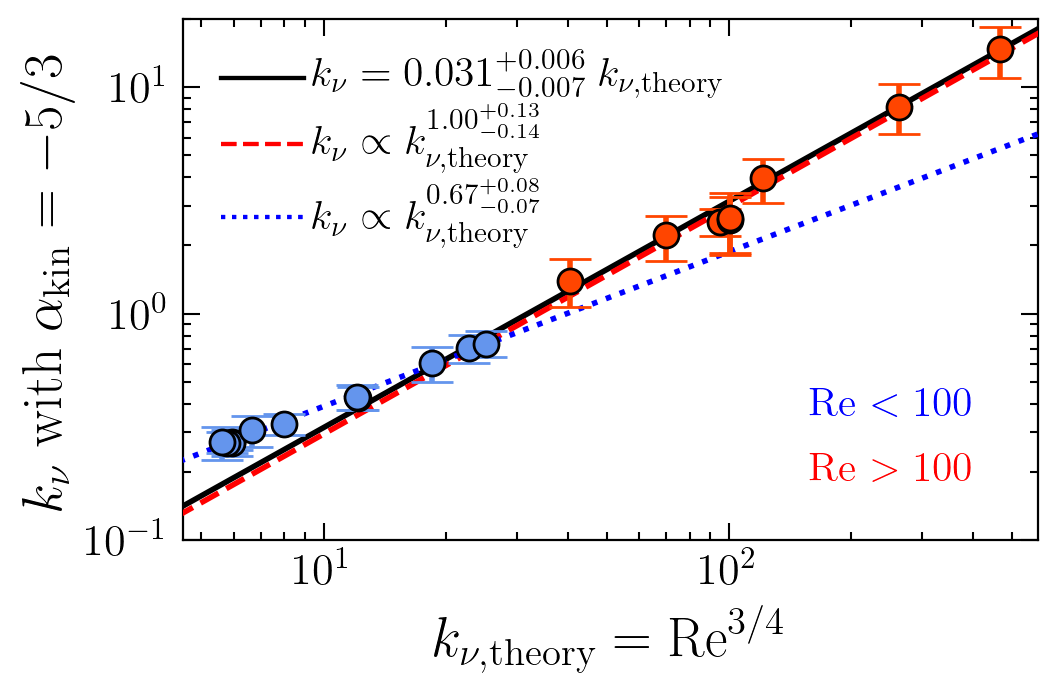

In [21]:
## define simulation points color
list_colors = [
    "cornflowerblue" if Re < 100
    else "orangered"
    for Re in fit_data_mixed.Re_group_sim
]
## plot measured vs predicted scales
funcPlotScaleRelations(
    filepath_plot = filepath_plot,
    list_colors = list_colors,
    list_Re = fit_data_mixed.Re_group_sim,
    list_Rm = fit_data_mixed.Rm_group_sim,
    list_Pm = fit_data_mixed.Pm_group_sim,
    list_relation_k_nu = [
        (Re)**(3/4)
        for Re in fit_data_mixed.Re_group_sim
    ],
    list_relation_k_eta = [
        (Re)**(3/4) * (Rm/Re)**(1/2)
        for Re, Rm in zip(
            fit_data_mixed.Re_group_sim,
            fit_data_mixed.Rm_group_sim
        )
    ],
    list_k_nu_converged_group = fit_data_mixed.list_k_nu_conv_group_sim,
    list_k_eta_converged_group = fit_data_mixed.list_k_eta_conv_group_sim,
)

	> Figure saved: fig_k_nu_comparison.pdf


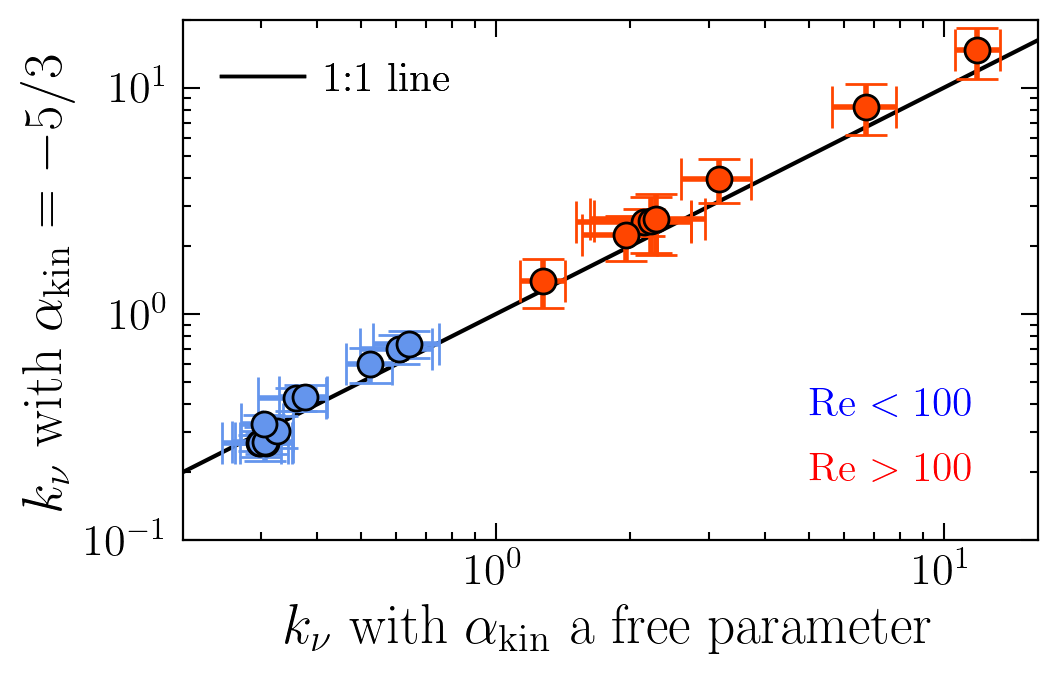

In [22]:
factor = 1.45
fig, axs = plt.subplots(figsize=(8/factor, 5/factor))
## define simulation points color
list_colors = [
    "cornflowerblue" if Re < 100
    else "orangered"
    for Re in fit_data_mixed.Re_group_sim
]
for sim_index in range(len(fit_data_mixed.Re_group_sim)):
    plotErrorBar(
        axs,
        data_x = fit_data_full.list_k_nu_conv_group_sim[sim_index],
        data_y = fit_data_mixed.list_k_nu_conv_group_sim[sim_index],
        color = list_colors[sim_index],
        marker = "o",
        ms = 9
    )
plot_domain = np.logspace(-2, 3, 100)
axs.add_collection(
    LineCollection(
        [ np.column_stack(( plot_domain, plot_domain )) ],
        linestyle="-", lw=1.5, color="black", zorder=7
    ),
    autolim = False # ignore these  points when setting the axis limits
)
addLegend(
    ax = axs,
    loc  = "upper left",
    bbox = (0.0, 1.0),
    artists = [ "-" ],
    colors  = [ "black" ],
    legend_labels = [
        "1:1 line"
    ],
    rspacing = 0.25,
    cspacing = 0.25,
    ncol = 1,
    fontsize = 15,
    labelcolor = "black",
    lw = 1.25
)
axs.text(
    0.925, 0.225,
    r"Re $< 100$", color="blue",
    va="bottom", ha="right", transform=axs.transAxes, fontsize=15
)
axs.text(
    0.925, 0.1,
    r"Re $> 100$", color="red",
    va="bottom", ha="right", transform=axs.transAxes, fontsize=15
)
axs.set_xlabel(r"$k_\nu$ with $\alpha_\mathrm{kin}$ a free parameter", fontsize=20)
axs.set_ylabel(r"$k_\nu$ with $\alpha_\mathrm{kin} = -5/3$", fontsize=20)
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_ylim([ 10**(-1), 20 ])
## save plot
fig_name = "fig_k_nu_comparison.pdf"
fig_filepath = createFilepath([filepath_plot, fig_name])
plt.savefig(fig_filepath)
print("\t> Figure saved: " + fig_name)

In [ ]:
class PlotSpectraAndScales():
    def __init__(
            self,
            filepath_plot,
            spectra_obj_0, spectra_obj_1
        ):
        ## initialise figure
        factor = 1.2
        fig, axs = plt.subplots(1, 1, figsize=(6/factor, 3.5/factor))
        ## plot Re 500 simulation
        self.plotSpectraObj(
            axs,
            spectra_obj = spectra_obj_0,
            list_colors = [ "green", "green" ]
        )
        ## plot Re 1500 simulation
        self.plotSpectraObj(
            axs,
            spectra_obj = spectra_obj_1,
            list_colors = [ "orange", "orange" ]
        )
        ## label axes
        axs.set_ylabel(r"$\widehat{\mathcal{P}}_{\mathrm{kin}}(k)$", fontsize=20)
        ## add legend
        addLegend(
            ax = axs,
            loc  = "upper right",
            bbox = (0.95, 1.0),
            artists = [ "-", "-" ],
            colors  = [ "green", "orange" ],
            legend_labels = [ r"Re470Pm2", r"Re1700Pm2" ],
            rspacing = 0.5,
            cspacing = 0.25,
            ncol = 1,
            fontsize = 15,
            labelcolor = "white"
        )
        axs.text(
            0.64, 0.9125,
            r"Re470Pm2", color="black",
            va="top", ha="left", transform=axs.transAxes, fontsize=13, zorder=10
        )
        axs.text(
            0.64, 0.77125,
            r"Re1700Pm2", color="black",
            va="top", ha="left", transform=axs.transAxes, fontsize=13, zorder=10
        )
        ## initialise figure domain bounds
        y_max = 1e2
        y_min = 1e-9
        x_max = 120
        x_min = 1
        ## adjust top axis
        axs.set_xlim(x_min, x_max)
        axs.set_ylim(y_min, y_max)
        axs.set_xscale("log")
        axs.set_yscale("log")
        locmin = mpl.ticker.LogLocator(
            base=10.0,
            subs=np.arange(2, 10) * 0.1,
            numticks=100
        )
        axs.yaxis.set_minor_locator(locmin)
        axs.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        locmin = mpl.ticker.LogLocator(
            base=10.0,
            subs=np.arange(2, 10) * 0.1,
            numticks=100
        )
        y_major = mpl.ticker.LogLocator(base=10.0, numticks=6)
        axs.yaxis.set_major_locator(y_major)
        ## save plot
        fig_name = "fig_spectra_mixed.pdf"
        fig_filepath = createFilepath([filepath_plot, fig_name])
        plt.savefig(fig_filepath)
        print("\t> Figure saved: " + fig_name)
    def plotSpectraObj(
            self,
            axs, spectra_obj, list_colors
        ):
        ## check that a time range has been defined to collect statistics about
        sim_times = getCommonElements(spectra_obj.vel_sim_times, spectra_obj.mag_sim_times)
        bool_vel_fit = (spectra_obj.vel_fit_start_t is not None) and (spectra_obj.vel_fit_end_t is not None)
        if not(bool_vel_fit):
            raise Exception("Fit range has not been defined.")
        ## find indices of velocity fit time range
        vel_index_start = getIndexClosestValue(sim_times, spectra_obj.vel_fit_start_t)
        vel_index_end   = getIndexClosestValue(sim_times, spectra_obj.vel_fit_end_t)
        ## load spectra
        list_vel_power = spectra_obj.vel_list_power_group_t[vel_index_start : vel_index_end]
        ## load measured scales
        list_k_nu  = cleanMeasuredScales(spectra_obj.k_nu_group_t[vel_index_start  : vel_index_end])
        ## plot velocity spectra
        self.plotSpectra(
            ax = axs,
            color  = list_colors[0],
            list_k = spectra_obj.vel_list_k_group_t[0],
            list_power = [
                np.array(vel_power) / np.sum(vel_power)
                for vel_power in list_vel_power
            ],
            list_fit_k = spectra_obj.vel_list_fit_k_group_t[0],
            list_fit_power = [
                np.array(vel_fit_power) / np.sum(vel_power)
                for vel_fit_power, vel_power in zip(
                    spectra_obj.vel_list_fit_power_group_t[vel_index_start : vel_index_end],
                    list_vel_power
                )
            ]
        )
        ## plot measured k_nu
        self.plotScale(
            axs, list_colors[0], r"$k_\nu$",
            list_fit_k = spectra_obj.vel_list_k_group_t[0],
            list_fit_power = [
                np.array(vel_fit_power) / np.sum(vel_power)
                for vel_fit_power, vel_power in zip(
                    spectra_obj.vel_list_power_group_t[vel_index_start : vel_index_end],
                    list_vel_power
                )
            ],
            list_scale   = list_k_nu,
            bool_pos_top = False
        )
    def plotSpectra(
            self,
            ax, color,
            list_k, list_power,
            list_fit_k, list_fit_power
        ):
        ## plot spectra data
        ax.plot(
            list_k,
            np.median(list_power, axis=0),
            color=color, ls="-", linewidth=2
        )
        ## plot spectra data error (in time average)
        ax.fill_between(
            list_k,
            1/1.2 * np.percentile(list_power, 16, axis=0),
            1.2 * np.percentile(list_power, 84, axis=0),
            facecolor=color, alpha=0.3, zorder=1
        )
        ## plot spectra fit
        ax.plot(
            list_fit_k,
            np.median(list_fit_power, axis=0),
            color="black", linestyle="-.", linewidth=2
        )
        list_median_fit_vals = list(np.median(list_fit_power, axis=0))
        list_median_vals = list(np.median(list_power, axis=0))
    def plotScale(
            self,
            ax, color, str_scale,
            list_fit_k, list_fit_power, list_scale,
            bool_pos_top = True
        ):
        ## annotate scale
        ax.text(
            0.5 * (np.percentile(list_scale, 16) + np.percentile(list_scale, 84)),
            2 if bool_pos_top else 5e-4,
            str_scale, ha="center",
            va = "bottom" if bool_pos_top else "top",
            fontsize = 18
        )
        ## indicate scale spread
        ax.annotate(
            text   = "",
            xy     = (
                np.percentile(list_scale, 16),
                1 if bool_pos_top else 1e-3
            ),
            xytext = (
                np.percentile(list_scale, 84),
                1 if bool_pos_top else 1e-3
            ),
            arrowprops=dict(
                linewidth  = 1.5,
                color      = color,
                arrowstyle = "|-|, widthA=0.25, widthB=0.25",
                shrinkA    = 0,
                shrinkB    = 0
            ), zorder = 5
        )
        ## connect scale spread to spectra curve
        ax.plot(
            [ np.percentile(list_scale, 50) ] * 2,
            [
                1 if bool_pos_top else 1e-3,
                np.median(list_fit_power, axis=0)[
                    getIndexClosestValue(
                        list_fit_k,
                        np.percentile(list_scale, 50)
                    )
                ]
            ],
            color=color, linestyle="-", linewidth=1.5, zorder=5
        )


In [ ]:
## plot spectra + measured scales
PlotSpectraAndScales(
    filepath_plot,
    loadPickleObject(
        createFilepath([
            filepath_data_base,
            "Re500",  "288", "Pm2"
        ]),
        "spectra_obj_mixed.pkl",
        bool_hide_updates = True
    ),
    loadPickleObject(
        createFilepath([
            filepath_data_base,
            "Rm3000",  "288", "Pm2"
        ]),
        "spectra_obj_mixed.pkl",
        bool_hide_updates = True
    )
)

In [ ]:
N = 10
val = 0
for i in range(N):
    val += 1/N**2
print(np.sqrt(val))
print(1/N)